In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor
import typing as t

In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [4]:

@rf.block
class NonSparkPath:
    ip_path: str
    op_path: rf.Output[str]
    def run(self):
        self.op_path.put(project_space_path(self.ip_path))
        

@rf.block
class ReadCsvProjectSpaceETA(SparkBlock):
    filename:str    
    def run(self):
        df = self.spark.read.csv(self.filename, header = True)
        print("Data Schema")
        df.printSchema()
        

@rf.block
class SelectDataDescribe(SparkBlock):
    filename: str
    def run(self):
        df = self.spark.read.csv(self.filename, header = True)
        print("Data Stat")
        df_stat = df.describe()
        df_stat.show()
        
        
        
        
        

In [5]:
nsp = NonSparkPath(ip_path='train_hatespeech.csv')
rcp = ReadCsvProjectSpaceETA(filename = nsp.op_path, config={}, source="")
sd = SelectDataDescribe(filename = nsp.op_path, config={}, source="")
# rcp.executor = rf.ProcessExecutor
# sd.executor = rf.ProcessExecutor

In [6]:
pipe = rf.Pipeline(targets = [rcp,sd])

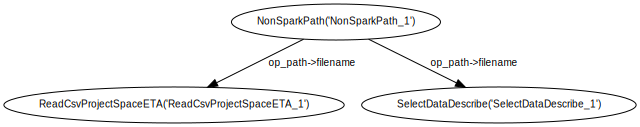

In [7]:
pipe.show()

In [8]:
pipe.execute()

log path: /tmp/tmpmjmybxn4/Pipeline_1


{}